In [20]:
import pandas as pd

In [21]:
df1=pd.read_csv("sample_data/credit_data.csv")

In [22]:
df1.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Annual Income,Years in current job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,NaN,6.0,1.0,228190.0,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,8.0,35.0,0.0,229976.0,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,29.0,18.0,1.0,297996.0,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,NaN,9.0,0.0,256329.0,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,NaN,15.0,0.0,253460.0,427174.0,0.0,0.0


In [ ]:
df1.shape

(100000, 19)

In [ ]:
df1["Loan Status"].value_counts()

Fully Paid     77361
Charged Off    22639
Name: Loan Status, dtype: int64

In [ ]:
import seaborn as sns

In [ ]:
import matplotlib as mpl

In [ ]:
mpl.rcParams['font.size'] = 18.0

In [ ]:
colors = ["white"]

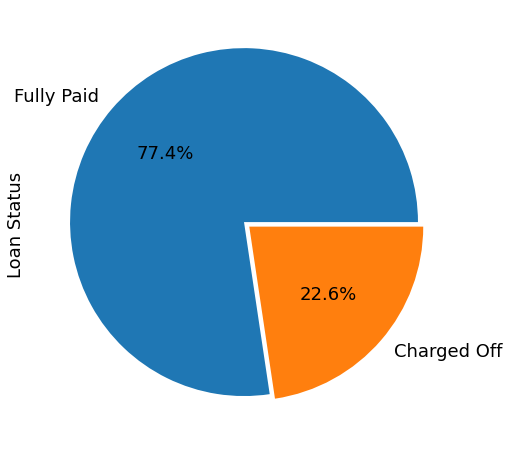

In [ ]:
round(df1["Loan Status"].value_counts()/ df1.shape[0]*100,2).plot.pie(autopct = '%1.1f%%',figsize =(8, 8),explode=(0.02,0.02))

In [ ]:
df1.isna().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    19154
Annual Income                   19154
Years in current job             4222
Home Ownership                      0
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    53141
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      204
Tax Liens                          10
dtype: int64

In [ ]:
##Removing Duplicate rows

df1.duplicated().sum()

10215

In [ ]:
df1.drop_duplicates(inplace = True)

In [ ]:
df1.shape

(89785, 19)

In [ ]:
## Handling Missing Values

def missing_values_table(df1):
        # Total missing values
        mis_val = df1.isnull().sum()
        
        # Percentage of missing values
        mis_val_percent = 100 * df1.isnull().sum() / len(df1)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        
        # Rename the columns
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        return mis_val_table_ren_columns

In [ ]:
missing_values_table(df1)

,Missing Values,% of Total Values
Months since last delinquent,48337,53.8
Credit Score,19154,21.3
Annual Income,19154,21.3
Years in current job,3802,4.2
Bankruptcies,190,0.2
Tax Liens,9,0.0
Maximum Open Credit,2,0.0


In [ ]:
df1 = df1.drop(columns = 'Months since last delinquent', axis=1)

In [ ]:
df1.dropna(subset=["Maximum Open Credit"] , inplace = True)

df1.dropna(subset=["Tax Liens"] , inplace = True)

df1.dropna(subset=["Bankruptcies"] , inplace = True)

In [ ]:
missing_values_table(df1)

,Missing Values,% of Total Values
Credit Score,19111,21.3
Annual Income,19111,21.3
Years in current job,3802,4.2


In [ ]:
## Changing column names

col=df1.columns.str.replace(' ','_')
df1.columns = col
df1.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8 years,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10+ years,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8 years,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3 years,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5 years,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [ ]:
mpl.rcParams['font.size'] = 12.0

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


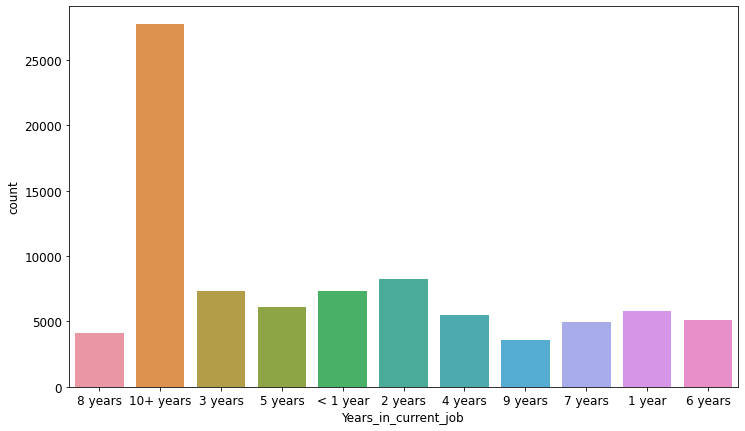

In [ ]:



# 'Years in current job' see its distribution
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize = (12,7))
sns.countplot(df1['Years_in_current_job'])

In [ ]:
df1['Years_in_current_job'].mode()

0    10+ years
dtype: object

In [ ]:
df1['Years_in_current_job'].isna().sum()

3802

In [ ]:
# let's fill with mode value
df1['Years_in_current_job']=df1['Years_in_current_job'].fillna(df1['Years_in_current_job'].mode()[0])

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


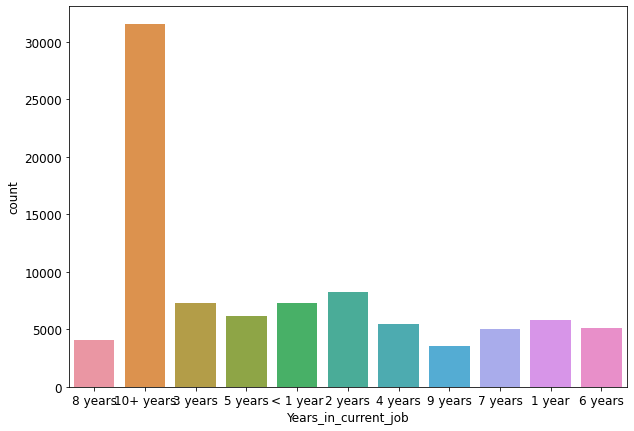

In [ ]:
plt.figure(figsize = (10,7))
sns.countplot(df1['Years_in_current_job'])

In [ ]:
# let's do some cleaning to this column
df1['Years_in_current_job']=df1['Years_in_current_job'].str.extract(r"(\d+)") # using reg.exp to capture one or more digits
df1['Years_in_current_job'] =df1['Years_in_current_job'].astype(float)

In [ ]:
df1['Years_in_current_job'].value_counts()

10.0    31528
1.0     13125
2.0      8227
3.0      7321
5.0      6128
4.0      5500
6.0      5125
7.0      4986
8.0      4110
9.0      3543
Name: Years_in_current_job, dtype: int64

In [ ]:
missing_values_table(df1)

,Missing Values,% of Total Values
Credit_Score,19111,21.3
Annual_Income,19111,21.3


In [ ]:
credit =df1[  df1['Credit_Score']>850]
credit.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
5,89d8cb0c-e5c2-4f54-b056-48a645c543dd,4ffe99d3-7f2a-44db-afc1-40943f1f9750,Charged Off,206602,Short Term,7290.0,896857.0,10.0,Home Mortgage,Debt Consolidation,16367.74,17.3,6,0,215308,272448.0,0.0,0.0
43,0c84b81a-e5a9-4a92-8dc8-fb179add03a4,628b0914-b1d7-4028-b590-b50f5da53d06,Charged Off,288948,Short Term,7120.0,537472.0,10.0,Rent,Debt Consolidation,5777.90,14.8,4,0,132468,164406.0,0.0,0.0
51,0daecc08-0354-4753-b282-52124b2420df,2884d362-391a-4941-af69-c825cae18002,Charged Off,219692,Long Term,6610.0,527839.0,10.0,Rent,Debt Consolidation,14207.63,17.0,9,0,254277,379918.0,0.0,0.0
56,a5ada080-a058-4ad2-8953-002b7ec1ae31,9966e08c-04a6-41ab-86d0-e4062c64bd41,Charged Off,78012,Short Term,7380.0,728726.0,4.0,Rent,major_purchase,10135.36,11.4,8,0,104633,199936.0,0.0,0.0
65,1704367e-1d71-4551-8d33-49aa15cab4b1,88f97adf-070a-47b1-9657-38276eef7d19,Charged Off,523908,Long Term,7370.0,1028774.0,6.0,Home Mortgage,Debt Consolidation,22632.99,19.3,5,0,474658,742720.0,0.0,0.0


In [ ]:
credit.shape

(4540, 18)

In [ ]:
###Some records have credit score more than 850 which seems like a data entry error
### We shall remove zeros
import numpy as np
def credit_error(value):
    credit_value = value
    credit_value['Credit_Score'] = np.where(value['Credit_Score'] > 851, value['Credit_Score'].values /10, value['Credit_Score'])
    return credit_value

In [ ]:
data= credit_error(df1)

In [ ]:
data.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,NaN,NaN,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,NaN,NaN,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [ ]:
data1=data
data.head()
data.isna().sum()

Loan_ID                          0
Customer_ID                      0
Loan_Status                      0
Current_Loan_Amount              0
Term                             0
Credit_Score                 19111
Annual_Income                19111
Years_in_current_job             0
Home_Ownership                   0
Purpose                          0
Monthly_Debt                     0
Years_of_Credit_History          0
Number_of_Open_Accounts          0
Number_of_Credit_Problems        0
Current_Credit_Balance           0
Maximum_Open_Credit              0
Bankruptcies                     0
Tax_Liens                        0
dtype: int64

In [ ]:
# let's fill with median


data1['Credit_Score'].fillna(data1['Credit_Score'].median(),inplace= True)

data1['Annual_Income'].fillna(data1['Annual_Income'].median(),inplace= True)

In [ ]:
data1.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,725.0,1169773.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,725.0,1169773.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [ ]:
data1.Credit_Score.describe()

count    89593.000000
mean       719.938109
std         25.091827
min        585.000000
25%        713.000000
50%        725.000000
75%        737.000000
max        751.000000
Name: Credit_Score, dtype: float64

In [ ]:
data2=data1
data2.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,725.0,1169773.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,725.0,1169773.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [ ]:
data2.Purpose.value_counts()

Debt Consolidation      70724
Other                    8084
Home Improvements        5226
Business Loan            1352
Buy a Car                1160
Medical Bills             980
Buy House                 582
Take a Trip               487
major_purchase            330
small_business            249
moving                    135
wedding                   102
vacation                   89
Educational Expenses       85
renewable_energy            8
Name: Purpose, dtype: int64

In [ ]:
data2.Purpose = data2.Purpose.str.replace('other','Other')
data2['Purpose'].value_counts()

Debt Consolidation      70724
Other                    8084
Home Improvements        5226
Business Loan            1352
Buy a Car                1160
Medical Bills             980
Buy House                 582
Take a Trip               487
major_purchase            330
small_business            249
moving                    135
wedding                   102
vacation                   89
Educational Expenses       85
renewable_energy            8
Name: Purpose, dtype: int64

In [ ]:
##Dropping columns insignificant for analysis and modelling
data2 = data2.drop(columns = ['Loan_ID','Customer_ID'] ,axis=1)

In [ ]:
data2.head()

,Loan_ID,Customer_ID,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,14dd8831-6af5-400b-83ec-68e61888a048,981165ec-3274-42f5-a3b4-d104041a9ca9,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,4771cc26-131a-45db-b5aa-537ea4ba5342,2de017a3-2e01-49cb-a581-08169e83be29,Fully Paid,262328,Short Term,725.0,1169773.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,4eed4e6a-aa2f-4c91-8651-ce984ee8fb26,5efb2b2b-bf11-4dfd-a572-3761a2694725,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,77598f7b-32e7-4e3b-a6e5-06ba0d98fe8a,e777faab-98ae-45af-9a86-7ce5b33b1011,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,d4062e70-befa-4995-8643-a0de73938182,81536ad9-5ccf-4eb8-befb-47a4d608658e,Fully Paid,176220,Short Term,725.0,1169773.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [ ]:
data2.isna().sum()

Loan_ID                      0
Customer_ID                  0
Loan_Status                  0
Current_Loan_Amount          0
Term                         0
Credit_Score                 0
Annual_Income                0
Years_in_current_job         0
Home_Ownership               0
Purpose                      0
Monthly_Debt                 0
Years_of_Credit_History      0
Number_of_Open_Accounts      0
Number_of_Credit_Problems    0
Current_Credit_Balance       0
Maximum_Open_Credit          0
Bankruptcies                 0
Tax_Liens                    0
dtype: int64

In [ ]:
#### Cleaned Dataframe till here
data2.isna().sum()
data2.duplicated().sum()

0

In [ ]:
data2.head()

,Loan_Status,Current_Loan_Amount,Term,Credit_Score,Annual_Income,Years_in_current_job,Home_Ownership,Purpose,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,Fully Paid,445412,Short Term,709.0,1167493.0,8.0,Home Mortgage,Home Improvements,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,Fully Paid,262328,Short Term,725.0,1169773.0,10.0,Home Mortgage,Debt Consolidation,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,Fully Paid,99999999,Short Term,741.0,2231892.0,8.0,Own Home,Debt Consolidation,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,Fully Paid,347666,Long Term,721.0,806949.0,3.0,Own Home,Debt Consolidation,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,Fully Paid,176220,Short Term,725.0,1169773.0,5.0,Rent,Debt Consolidation,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [ ]:
data2['Loan_Status'] = data2['Loan_Status'].replace('Fully Paid',0)


In [ ]:
data2['Loan_Status'].value_counts()

0              67006
Charged Off    22587
Name: Loan_Status, dtype: int64

In [ ]:
data2['Loan_Status'] = data2['Loan_Status'].replace('Charged Off',1)


In [ ]:
data2.Loan_Status.value_counts()

0    67006
1    22587
Name: Loan_Status, dtype: int64

In [ ]:
### Extracting all the categorical columns in a dataframe
data2_cat=data2[["Term","Home_Ownership","Purpose"]]

In [ ]:
data2_cat.head()

,Term,Home_Ownership,Purpose
0,Short Term,Home Mortgage,Home Improvements
1,Short Term,Home Mortgage,Debt Consolidation
2,Short Term,Own Home,Debt Consolidation
3,Long Term,Own Home,Debt Consolidation
4,Short Term,Rent,Debt Consolidation


In [ ]:
from sklearn.preprocessing import LabelEncoder

#create instance of label encoder
lab = LabelEncoder()

In [ ]:
categ = ["Term","Home_Ownership","Purpose"]
# Encode Categorical Columns

data2_cat[categ] = data2_cat[categ].apply(lab.fit_transform)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [ ]:
data3=data2.drop(["Term","Home_Ownership","Purpose"],axis=1)

In [ ]:
data3.head()

,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,0,445412,709.0,1167493.0,8.0,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,0,262328,725.0,1169773.0,10.0,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,0,99999999,741.0,2231892.0,8.0,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,0,347666,721.0,806949.0,3.0,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,0,176220,725.0,1169773.0,5.0,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [ ]:
final_data=pd.concat([data2_cat,data3,],axis=1)

In [ ]:
final_data.head()

,Term,Home_Ownership,Purpose,Loan_Status,Current_Loan_Amount,Credit_Score,Annual_Income,Years_in_current_job,Monthly_Debt,Years_of_Credit_History,Number_of_Open_Accounts,Number_of_Credit_Problems,Current_Credit_Balance,Maximum_Open_Credit,Bankruptcies,Tax_Liens
0,1,1,5,0,445412,709.0,1167493.0,8.0,5214.74,17.2,6,1,228190,416746.0,1.0,0.0
1,1,1,3,0,262328,725.0,1169773.0,10.0,33295.98,21.1,35,0,229976,850784.0,0.0,0.0
2,1,2,3,0,99999999,741.0,2231892.0,8.0,29200.53,14.9,18,1,297996,750090.0,0.0,0.0
3,0,2,3,0,347666,721.0,806949.0,3.0,8741.90,12.0,9,0,256329,386958.0,0.0,0.0
4,1,3,3,0,176220,725.0,1169773.0,5.0,20639.70,6.1,15,0,253460,427174.0,0.0,0.0


In [ ]:
final_data.shape

(89593, 16)

In [ ]:
final_data.to_excel("Pre_processed_data_2.xlsx")